In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_offer = pd.read_parquet('../../data/01_processed/ofertas_relampago.parquet')

<b> Se va empezar con los básicos:</b>
- Lineas de ventas agregadas por dias
- Quebras por Verticales
- Lineas de ventas agregadas por shippment y entendimiento de Origin

In [3]:
# Transformando en datetime la data
df_offer['OFFER_START_DATE'] = pd.to_datetime(df_offer['OFFER_START_DATE'])

### Entendimiento General y de Verticales

In [4]:
# Agrupando la ventas por dia
ventas_diarias = df_offer.groupby('OFFER_START_DATE').agg({
    'SOLD_QUANTITY': 'sum',
    'SOLD_AMOUNT': 'sum',
    'DURATION_HOURS':'mean'
}).reset_index()

In [5]:
# Creando la cuenta de ventas medias por horas
ventas_diarias['AVG_SALES_QUANTITY'] = ventas_diarias['SOLD_QUANTITY'] / ventas_diarias['DURATION_HOURS']
ventas_diarias['AVG_SALES_AMOUNT'] =ventas_diarias['SOLD_AMOUNT'] / ventas_diarias['DURATION_HOURS']

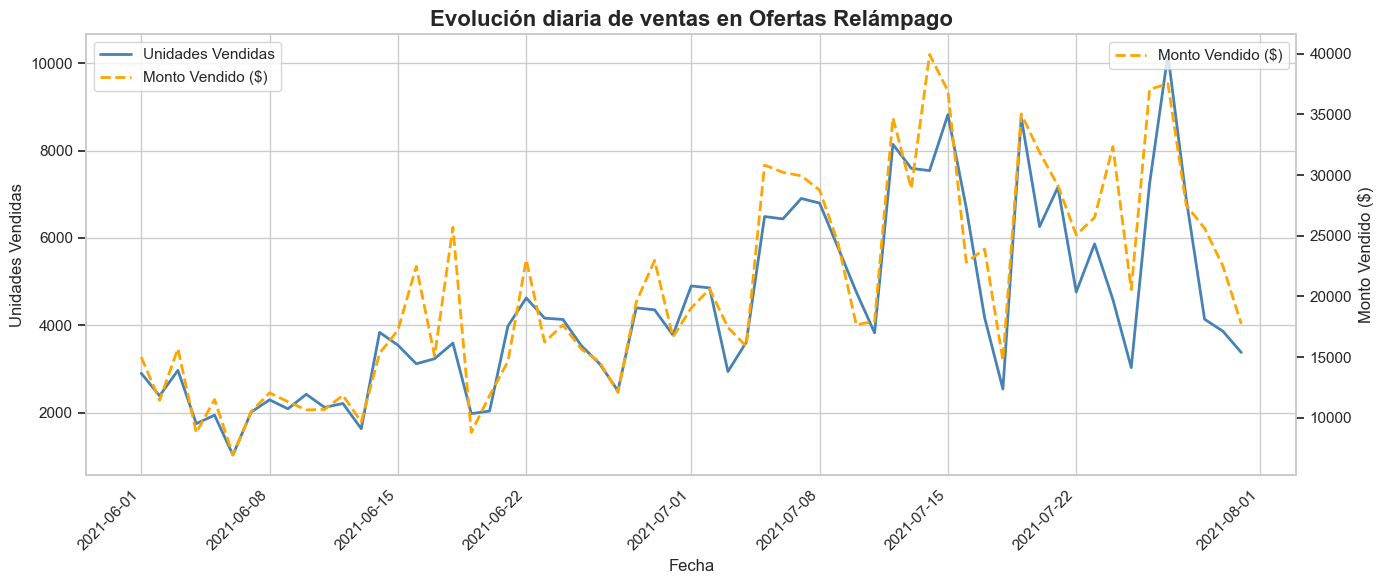

In [6]:
# Configurar estilo limpio
sns.set_theme(style='whitegrid')

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Graficar Unidades Vendidas
sns.lineplot(
    data=ventas_diarias,
    x='OFFER_START_DATE',
    y='SOLD_QUANTITY',
    ax=ax1,
    label='Unidades Vendidas',
    linewidth=2,
    color='steelblue'
)

# Segundo eje para Monto Vendido
ax2 = ax1.twinx()
sns.lineplot(
    data=ventas_diarias,
    x='OFFER_START_DATE',
    y='SOLD_AMOUNT',
    ax=ax2,
    label='Monto Vendido ($)',
    color='orange',
    linewidth=2,
    linestyle='--'
)

# Títulos y etiquetas
ax1.set_title('Evolución diaria de ventas en Ofertas Relámpago', fontsize=16, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Unidades Vendidas')
ax2.set_ylabel('Monto Vendido ($)')

# Desactivar la grilla del segundo eje
ax2.grid(False)

# Combinar leyendas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

# Rotar fechas
fig.autofmt_xdate(rotation=45)

plt.tight_layout()
plt.show()

Me encanta que em muchos dias cuando agregamos Se tienen una cantidad de itens mayores que lo monto, entonces probablemente itens muy baratos están entrando?
- Se va tener que entender eso un poco mejor, creo que Esto es por cuenta de las distintas verticales itens de CE pueden ser mayores que los itens de Apparel y etc.

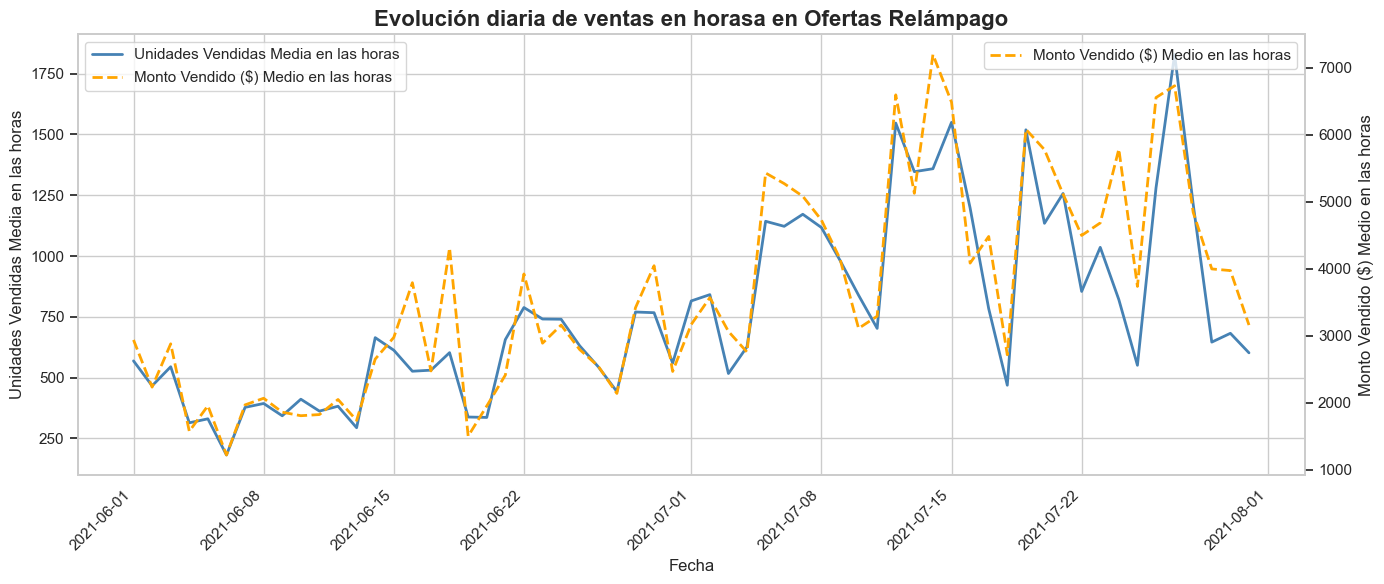

In [7]:
# Configurar estilo limpio
sns.set_theme(style='whitegrid')

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Graficar Unidades Vendidas
sns.lineplot(
    data=ventas_diarias,
    x='OFFER_START_DATE',
    y='AVG_SALES_QUANTITY',
    ax=ax1,
    label='Unidades Vendidas Media en las horas',
    linewidth=2,
    color='steelblue'
)

# Segundo eje para Monto Vendido
ax2 = ax1.twinx()
sns.lineplot(
    data=ventas_diarias,
    x='OFFER_START_DATE',
    y='AVG_SALES_AMOUNT',
    ax=ax2,
    label='Monto Vendido ($) Medio en las horas',
    color='orange',
    linewidth=2,
    linestyle='--'
)

# Títulos y etiquetas
ax1.set_title('Evolución diaria de ventas en horasa en Ofertas Relámpago', fontsize=16, fontweight='bold')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Unidades Vendidas Media en las horas')
ax2.set_ylabel('Monto Vendido ($) Medio en las horas')

# Desactivar la grilla del segundo eje
ax2.grid(False)

# Combinar leyendas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

# Rotar fechas
fig.autofmt_xdate(rotation=45)

plt.tight_layout()
plt.show()

Tambien es posible de ver que son mucho parecidas las dos curvas tanto de los valores brutos cuanto distribuidos por horas

In [8]:
## Empezando a entender por verticales, vamos entender lo ticket medio de los itens de los grupos y tambien
df_offer['TICKET_MEDIO'] = df_offer['SOLD_AMOUNT'] / df_offer['SOLD_QUANTITY']

# Calcular ticket medio promedio por vertical (omitimos NaN y divisiones inválidas)
ticket_por_vertical = df_offer.groupby('VERTICAL')['TICKET_MEDIO'].mean().sort_values(ascending=False).reset_index()

In [9]:
# Vamos definir una paletta mas parecida com Meli
meli_palette = [
    '#FFE600',  # Amarillo principal
    '#002E6D',  # Azul oscuro
    '#FFCC00',  # Amarillo suave
    '#0053B3',  # Azul medio
    '#80BFFF',  # Azul claro
    '#B3B3B3',  # Gris claro
    '#F2A900',  # Amarillo dorado (extra branding)
    '#004AAD',  # Azul vibrante
    '#D9D9D9'   # Gris muy claro
]

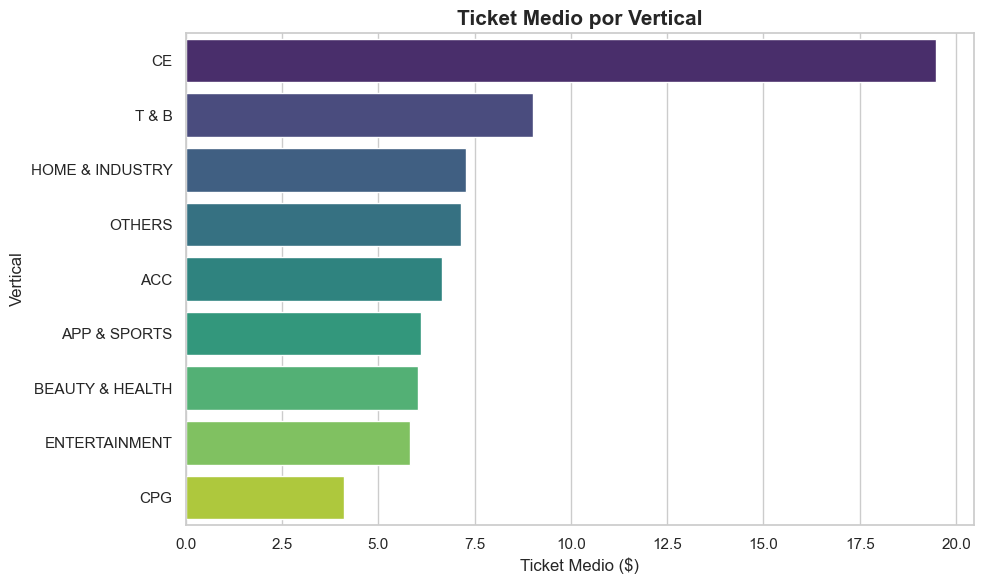

In [10]:
# Visualizar con gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ticket_por_vertical,
    x='TICKET_MEDIO',
    y='VERTICAL',
    hue='VERTICAL',
    palette='viridis',
    legend=False
)

plt.title('Ticket Medio por Vertical', fontsize=15, fontweight='bold')
plt.xlabel('Ticket Medio ($)')
plt.ylabel('Vertical')
plt.tight_layout()
plt.show()

In [11]:
ticket_ce = ticket_por_vertical.loc[ticket_por_vertical['VERTICAL']=='CE']['TICKET_MEDIO'].values[0]
ticket_tb = ticket_por_vertical.loc[ticket_por_vertical['VERTICAL']=='T & B']['TICKET_MEDIO'].values[0]

In [12]:
ticket_ce / ticket_tb

2.162859443375845

<b> Como pensavamos la categoria de CE es la más cara, en media 2.16 vezes más cara que la segunda mayor vertical en ticket medio </b>
- Se tienen que analisar la linea por vertical y entender donde se genera mas pedidos y monto
- Juntando las dos informaciones Se podrá entender como está cada vertical

In [13]:
ventas_por_vertical = (
    df_offer
    .groupby(['OFFER_START_DATE', 'VERTICAL'])
    .agg(SOLD_AMOUNT=('SOLD_AMOUNT', 'sum'),
         SOLD_QUANTITY=('SOLD_QUANTITY', 'sum'))
    .reset_index()
)

In [14]:
# Vamos usar minimum values para delimitar los plots de la facet por lo minimo y maximo que tenemos
min_qty = ventas_por_vertical['SOLD_QUANTITY'].min()
max_qty = ventas_por_vertical['SOLD_QUANTITY'].max()

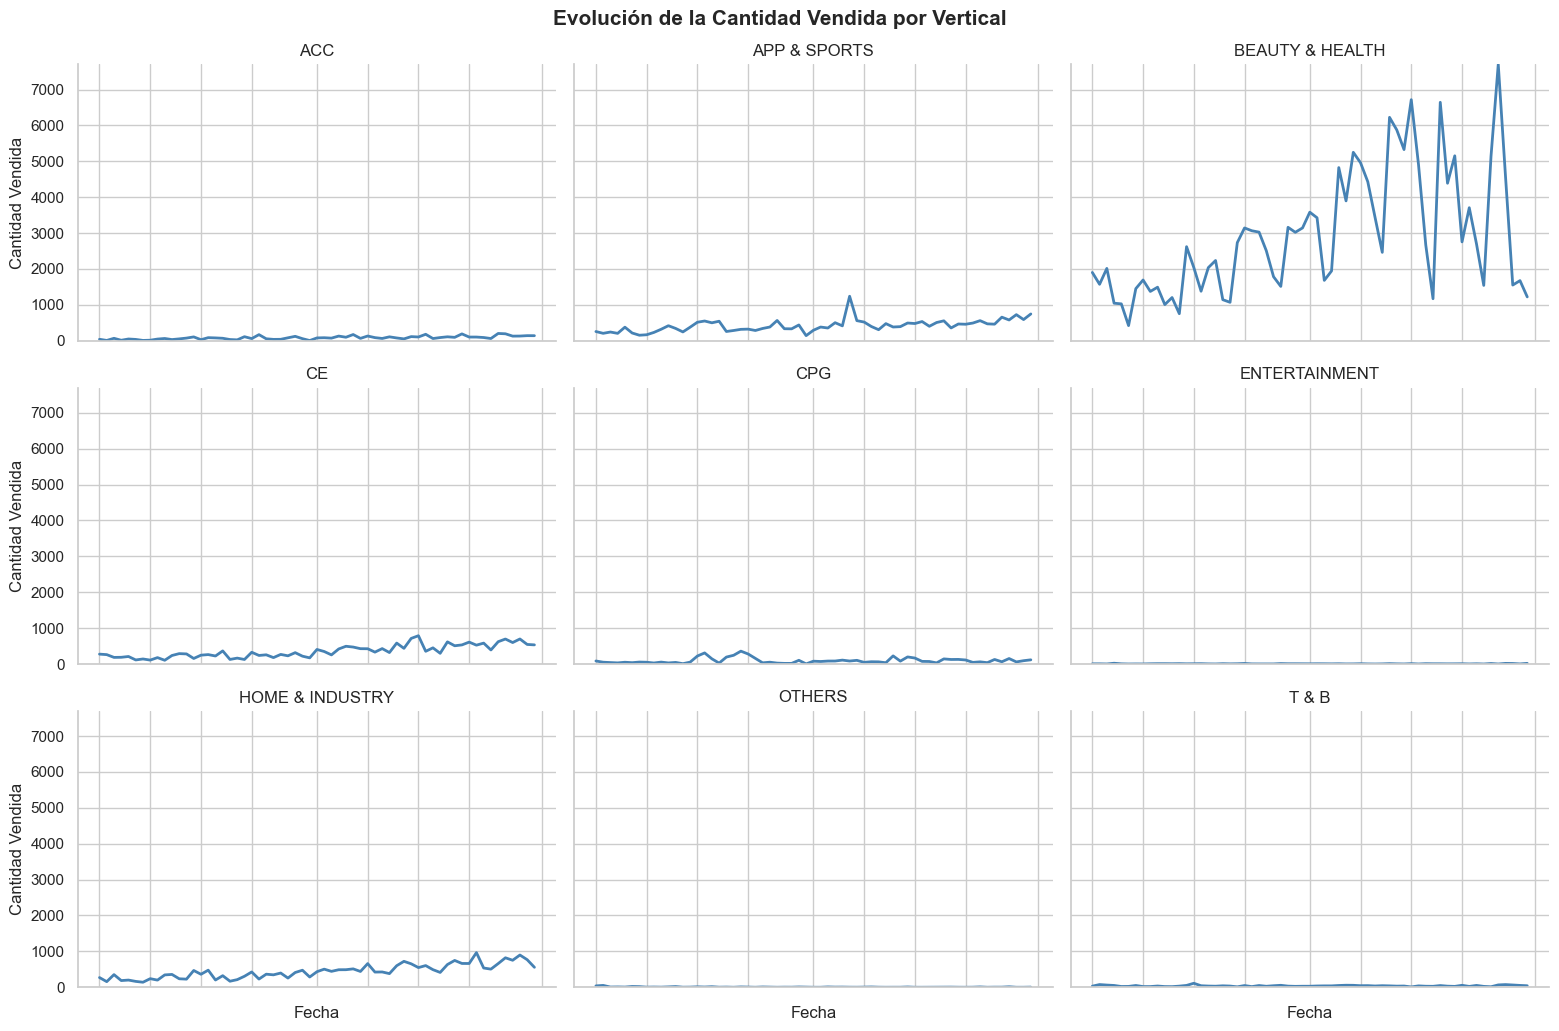

In [15]:
# Subplot por vertical
g_qty = sns.FacetGrid(
    ventas_por_vertical,
    col='VERTICAL',
    col_wrap=3,
    height=3.5,
    aspect=1.5,
    sharey=True
)

g_qty.map_dataframe(
    sns.lineplot,
    x='OFFER_START_DATE',
    y='SOLD_QUANTITY',
    color='steelblue',
    linewidth=2
)

# Fijar límites iguales en todos los ejes
for ax in g_qty.axes.flat:
    ax.set_ylim(min_qty, max_qty)

g_qty.set_titles('{col_name}')
g_qty.set_axis_labels('Fecha', 'Cantidad Vendida')
g_qty.fig.suptitle('Evolución de la Cantidad Vendida por Vertical', fontsize=15, fontweight='bold')
g_qty.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

<b> Por ahora Se observa que las mayores ventas son de la categoria de Beauty & Health </b>
- Beauty & Health es la 3a menor de las categorias en ticket medio
- Categorias como Entertainment, Toys and Babies y others casi no tienen ventas

In [16]:
# Calcular límites globales de monto
min_amt = ventas_por_vertical['SOLD_AMOUNT'].min()
max_amt = ventas_por_vertical['SOLD_AMOUNT'].max()

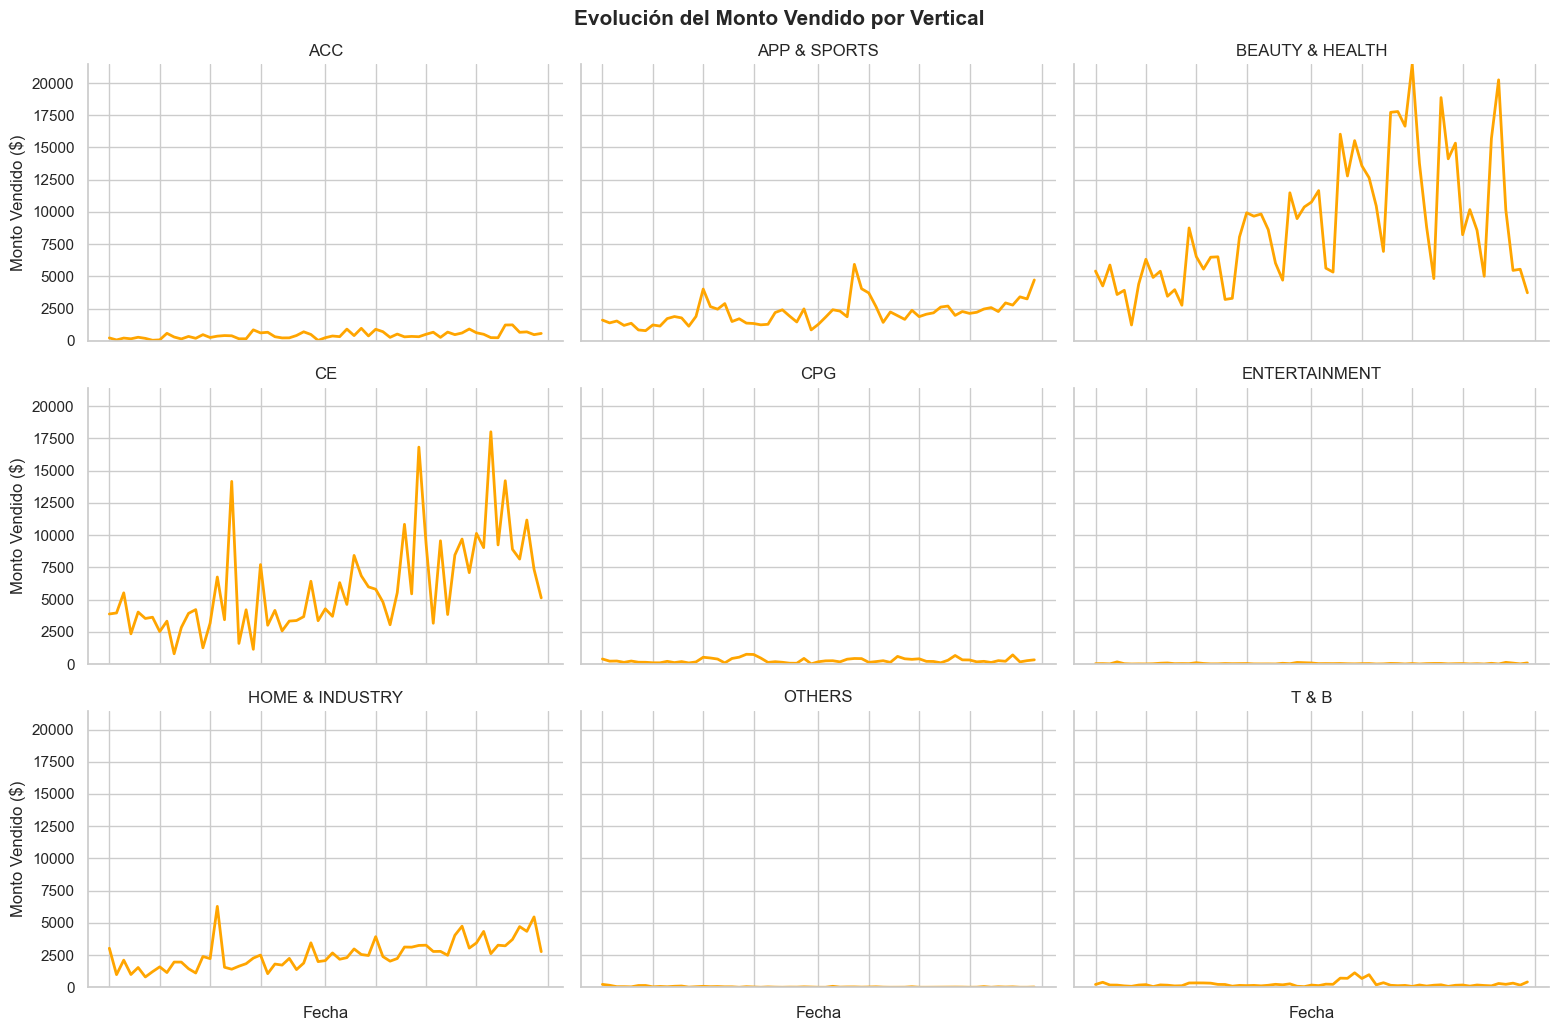

In [17]:
#Creando la Facet de Monto
g_amt = sns.FacetGrid(
    ventas_por_vertical,
    col='VERTICAL',
    col_wrap=3,
    height=3.5,
    aspect=1.5,
    sharey=True
)

g_amt.map_dataframe(
    sns.lineplot,
    x='OFFER_START_DATE',
    y='SOLD_AMOUNT',
    color='orange',
    linewidth=2
)

for ax in g_amt.axes.flat:
    ax.set_ylim(min_amt, max_amt)

g_amt.set_titles('{col_name}')
g_amt.set_axis_labels('Fecha', 'Monto Vendido ($)')
g_amt.fig.suptitle('Evolución del Monto Vendido por Vertical', fontsize=15, fontweight='bold')
g_amt.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

<b> Home & Industry y Entertainment parecen las categorias que más generan Monto </b>
- Claro Beauty & Health tienes muchissimas ventas por lo que ya analisamos
- CE es la 1a mayor en ticket medio, y tiene una cantidade de ventas razoables.
- Se va intentar poner las duas categorias en vista en un unico grafico para entender

In [18]:
# Filtrar solo las dos verticales
verticales_focus = ['CE', 'BEAUTY & HEALTH']
df_focus = ventas_por_vertical[ventas_por_vertical['VERTICAL'].isin(verticales_focus)]

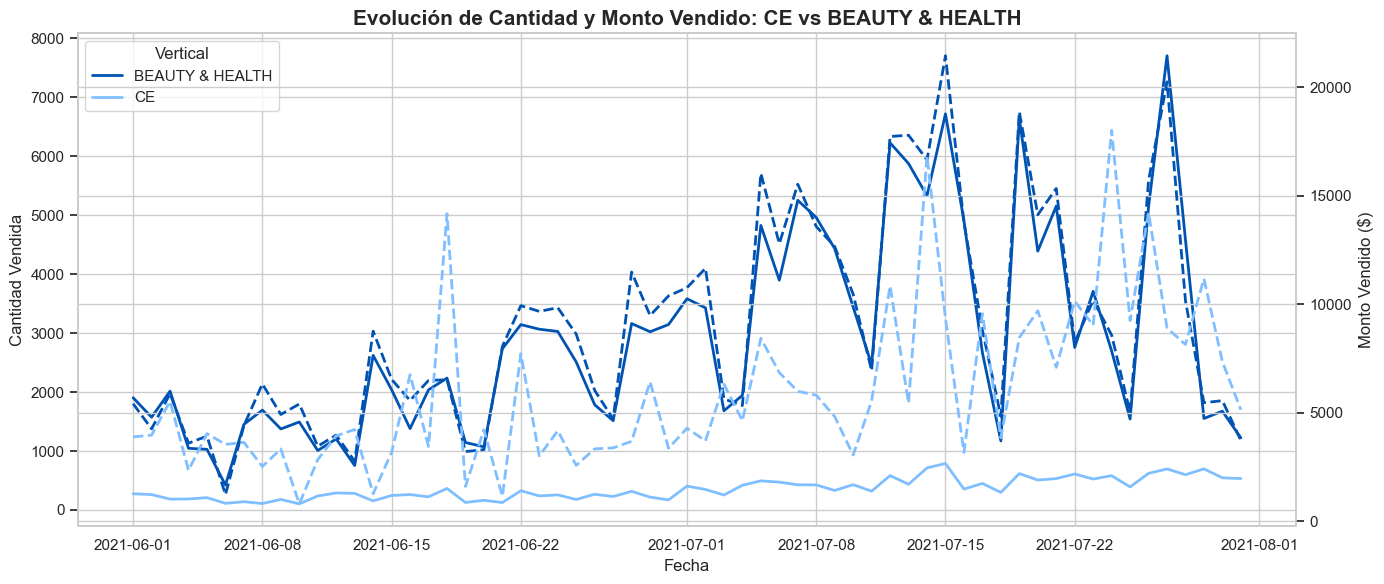

In [19]:
# Estilo general
plt.figure(figsize=(14, 6))

# Crear primer eje
ax1 = plt.gca()

# Plot de cantidad vendida
sns.lineplot(
    data=df_focus,
    x='OFFER_START_DATE',
    y='SOLD_QUANTITY',
    hue='VERTICAL',
    ax=ax1,
    palette=['#0053B3', '#80BFFF'],
    linewidth=2,
    linestyle='-'
)

ax1.set_ylabel('Cantidad Vendida')
ax1.set_xlabel('Fecha')

# Segundo eje (monto vendido)
ax2 = ax1.twinx()

sns.lineplot(
    data=df_focus,
    x='OFFER_START_DATE',
    y='SOLD_AMOUNT',
    hue='VERTICAL',
    ax=ax2,
    palette=['#0053B3', '#80BFFF'],
    linewidth=2,
    linestyle='--',
    legend=False  # para evitar duplicados
)

ax2.set_ylabel('Monto Vendido ($)')

# Título
plt.title('Evolución de Cantidad y Monto Vendido: CE vs BEAUTY & HEALTH', fontsize=15, fontweight='bold')

# Combinar leyenda
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, title='Vertical', loc='upper left')

# Mejorar formato
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Beauty & Health** muestra una **tendencia creciente** en ventas desde mediados de junio, con **picos consistentes** tanto en cantidad como en monto monto monto monto monto vendido.
- **CE** tiene un comportamiento más **irregular**, con algunos picos de monto alto pero **menos unidades vendidas**, lo que indica un **ticket medio más alto**.
- En resumen, **Beauty & Health domina en volumen y constancia**, mientras que **CE depende de productos puntuales de alto valor**.


### Entidimiento de ventas por horas generales y por verticales

In [20]:
ventas_por_vertical = (
    df_offer
    .groupby(['OFFER_START_DATE', 'VERTICAL'])
    .agg(SOLD_AMOUNT=('SOLD_AMOUNT', 'sum'),
         SOLD_QUANTITY=('SOLD_QUANTITY', 'sum'),
         DURATION_HOURS =('DURATION_HOURS', 'mean')
        )
    .reset_index()
)

In [21]:
# Creando la cuenta de ventas medias por horas
ventas_por_vertical['AVG_SALES_QUANTITY'] = ventas_por_vertical['SOLD_QUANTITY'] / ventas_por_vertical['DURATION_HOURS']
ventas_por_vertical['AVG_SALES_AMOUNT'] =ventas_por_vertical['SOLD_AMOUNT'] / ventas_por_vertical['DURATION_HOURS']

In [22]:
# Vamos usar minimum values para delimitar los plots de la facet por lo minimo y maximo que tenemos
min_qty = ventas_por_vertical['AVG_SALES_QUANTITY'].min()
max_qty = ventas_por_vertical['AVG_SALES_QUANTITY'].max()

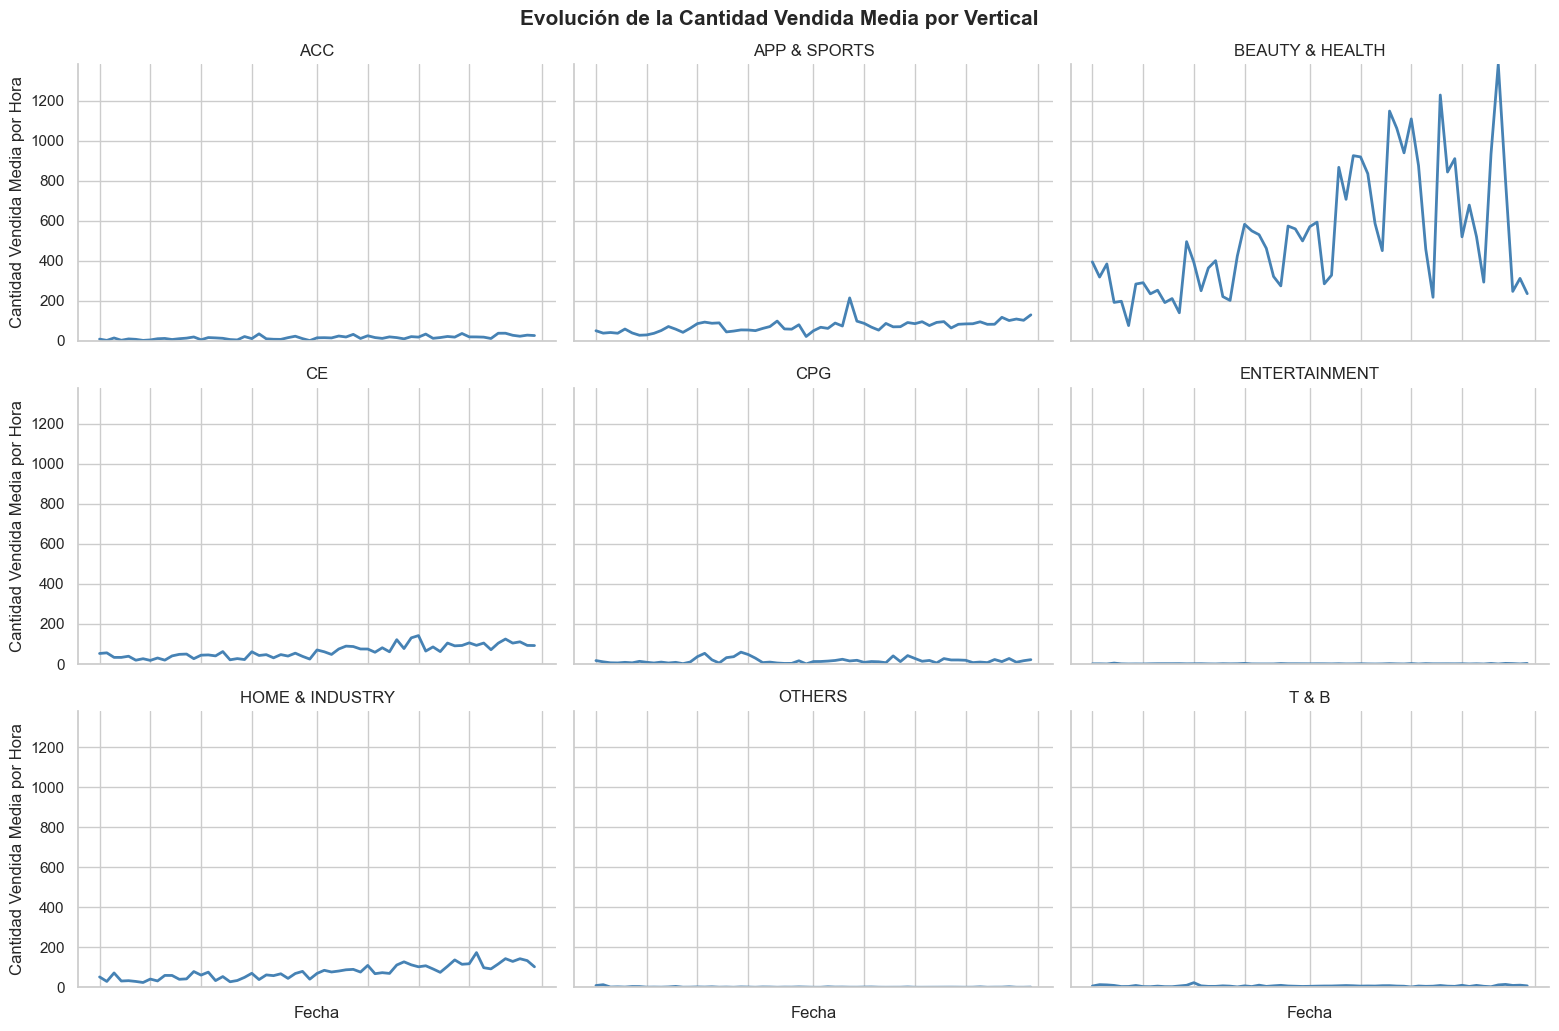

In [23]:
# Subplot por vertical
g_qty = sns.FacetGrid(
    ventas_por_vertical,
    col='VERTICAL',
    col_wrap=3,
    height=3.5,
    aspect=1.5,
    sharey=True
)

g_qty.map_dataframe(
    sns.lineplot,
    x='OFFER_START_DATE',
    y='AVG_SALES_QUANTITY',
    color='steelblue',
    linewidth=2
)

# Fijar límites iguales en todos los ejes
for ax in g_qty.axes.flat:
    ax.set_ylim(min_qty, max_qty)

g_qty.set_titles('{col_name}')
g_qty.set_axis_labels('Fecha', 'Cantidad Vendida Media por Hora')
g_qty.fig.suptitle('Evolución de la Cantidad Vendida Media por Vertical', fontsize=15, fontweight='bold')
g_qty.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

<b> Por acá vemos lo mismo comportamiento </b>
- Probablemente la distribuicion de duration hours por ofertas son las mismas en las categorias
- Se va entender un poco con un describe

In [24]:
df_offer.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DURATION_HOURS,START_DAY_OF_WEEK,START_MONTH,QUANTITY_PER_HOUR,AMOUNT_PER_HOUR,TICKET_MEDIO
count,48746,48746.000000,48746.000000,24579.000000,24579.000000,48746.000000,48746.000000,48746.000000,24579.000000,24579.000000,24579.000000
mean,2021-07-05 11:24:49.008328704,35.007508,30.565216,51.208898,10.851052,5.708344,3.000082,6.623846,2.102697,9.287235,8.840607
min,2021-06-01 00:00:00,1.000000,-192.000000,0.280000,1.000000,0.000000,0.000000,6.000000,0.068173,0.039994,0.121333
25%,2021-06-22 00:00:00,5.000000,4.000000,5.730000,1.000000,6.000000,1.000000,6.000000,0.166659,0.946579,2.365000
50%,2021-07-07 00:00:00,10.000000,8.000000,12.420000,3.000000,6.000556,3.000000,7.000000,0.499861,2.138046,3.994000
75%,2021-07-21 00:00:00,15.000000,15.000000,30.925000,6.000000,6.004444,5.000000,7.000000,1.166289,5.942498,7.670000
max,2021-07-31 00:00:00,9000.000000,8635.000000,4836.570000,1646.000000,104.752500,6.000000,7.000000,354.929577,1290.951555,639.070000
std,NaN,206.761058,195.813806,175.254414,45.475305,2.113096,1.937965,0.484424,8.104597,31.642890,22.367321


### Si eso nos confirma que la media de duracion es de 6 horas de una oferta relampago pero Se tienen outliers

In [25]:
# Filtrar valores válidos
df_duracion = df_offer.dropna(subset=['DURATION_HOURS', 'VERTICAL'])

C:\Users\leand\AppData\Local\Temp\ipykernel_15768\2744382290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


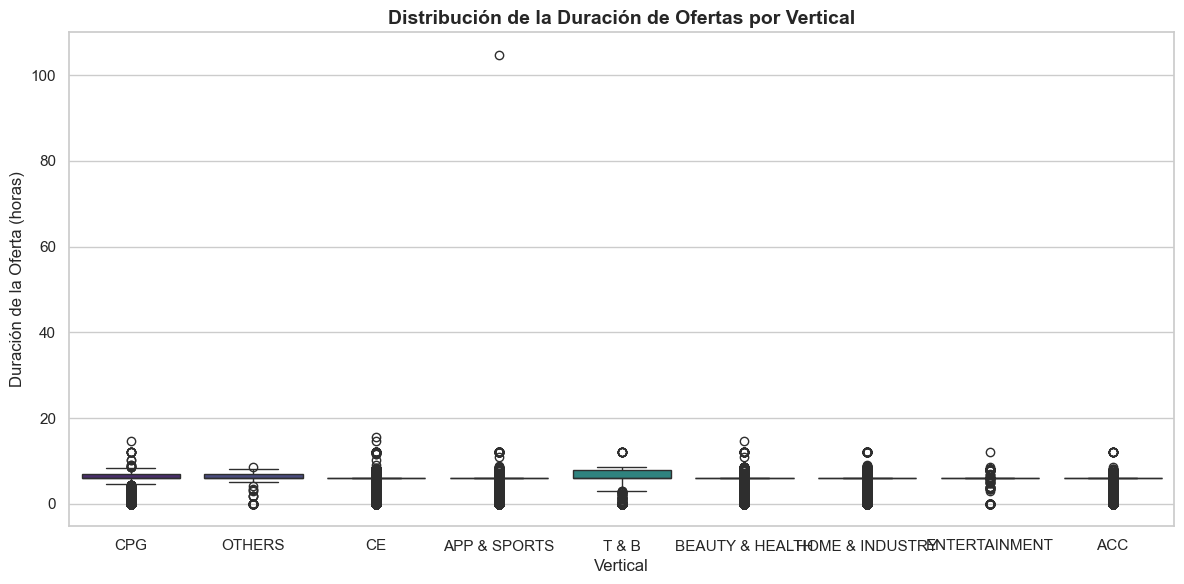

In [26]:


# Crear gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_duracion,
    x='VERTICAL',
    y='DURATION_HOURS',
    palette='viridis'
)

# Títulos y etiquetas
plt.title('Distribución de la Duración de Ofertas por Vertical', fontsize=14, fontweight='bold')
plt.xlabel('Vertical')
plt.ylabel('Duración de la Oferta (horas)')

plt.tight_layout()
plt.show()

<b> En media estan muy cerca una de las otras, pero existe un super outlier en APP & SPORTS Se va entenderlos y despues para lo proximo notebook Se va entender un poquito de shipment / Origin

In [27]:
df_offer.loc[df_offer['DURATION_HOURS']>=100]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,DURATION_HOURS,START_DAY_OF_WEEK,START_MONTH,QUANTITY_PER_HOUR,AMOUNT_PER_HOUR,TICKET_MEDIO
42018,2021-06-05,2021-06-05 13:00:00+00:00,2021-06-09 21:45:09+00:00,5,5,NaN,NaN,Otros,none,APPAREL ACCESORIES,APP & SPORTS,MLM-SLEEPING_MASKS,104.7525,5,6,NaN,NaN,NaN


It was a sleeping mask that didn't sell anything

In [32]:
df_offer.groupby('DOMAIN_ID').agg({'SOLD_QUANTITY':'sum','SOLD_AMOUNT':'sum'}).reset_index().sort_values(by='SOLD_AMOUNT',ascending=False)

,DOMAIN_ID,SOLD_QUANTITY,SOLD_AMOUNT
1094,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,141369.0,410363.30
239,MLM-CELLPHONES,1769.0,111678.79
1131,MLM-TELEVISIONS,451.0,66366.08
369,MLM-DISPOSABLE_GLOVES,13477.0,55365.39
589,MLM-HEADPHONES,4447.0,29628.06
...,...,...,...
816,MLM-MOTORCYCLE_TRANSMISSION_KITS,0.0,0.00
263,MLM-CHOCOLATE_WATERFALLS,0.0,0.00
808,MLM-MOTORCYCLE_GOGGLES,0.0,0.00
264,MLM-CHOPSTICKS,0.0,0.00
